# Data Preprocessing And Feature Engineering

In [28]:
# loda training datasets
import pandas as pd
df = pd.read_csv("./data/datasets/train_qWM28Yl.csv")
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [29]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [ ]:
# df.info()

# identify important features for training model with.

In [30]:
# identify important columns.
# engine_type, model, make, population_density, age_of_policyholder, age_of_car, area_cluster, fuel_type, max_torque, max_power, airbags, is_parking_sensors, is_parking_camera, cylinder, transmission_type, gear_box, length, width, height, gross_weight, is_speed_alert, is_claim

# features = [ 'engine_type', 'model', 'make', 'population_density', 'age_of_policyholder', 'age_of_car', 'area_cluster', 'fuel_type', 'max_torque', 'max_power', 'airbags', 'is_parking_sensors', 'is_parking_camera', 'cylinder', 'transmission_type', 'gear_box', 'length', 'width', 'height', 'gross_weight', 'is_speed_alert', "is_claim" ]

print( "features in dataset:\n".upper(), df.columns )

features = [ 'engine_type', 'fuel_type', 'population_density', 'cylinder', 'transmission_type', 'gear_box', 'length', 'width', 'height', 'gross_weight', 'is_speed_alert', "is_claim" ]
print( "\nSelected Features:\n".upper(), features)

FEATURES IN DATASET:
 Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

SELECTED FEATURES:
 ['engine_type', 'fuel_type', 'population_density', 'cylinder', 'transmission_type', 'gear_bo

In [31]:
df = df[features]
# assume there is no duplicates or NA values or rows.
# df.dropna(inplace=True, axis=0 )
# df.drop_duplicates(inplace=True,)
df.head()

,engine_type,fuel_type,population_density,cylinder,transmission_type,gear_box,length,width,height,gross_weight,is_speed_alert,is_claim
0,F8D Petrol Engine,CNG,4990,3,Manual,5,3445,1515,1475,1185,Yes,0
1,F8D Petrol Engine,CNG,27003,3,Manual,5,3445,1515,1475,1185,Yes,0
2,F8D Petrol Engine,CNG,4076,3,Manual,5,3445,1515,1475,1185,Yes,0
3,1.2 L K12N Dualjet,Petrol,21622,4,Automatic,5,3995,1735,1515,1335,Yes,0
4,1.0 SCe,Petrol,34738,3,Automatic,5,3731,1579,1490,1155,Yes,0


In [32]:
# bhp = torque * rpm / 5252
print("data shape:", df.shape )

data shape: (58592, 12)


##### remove max torque and power from features, until an optimal idea is found.

In [68]:
# # preprocess max_torque and max_power features. | remove them
# import re
# text = "91Nm@4250rpm"
# text = str(text).lower()
# text = text.split("@")
# text[0] = re.sub("nm", '', text[0])
# text[1] = re.sub("rpm", '', text[1])
# text
    

['91', '4250']

In [69]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# ss = StandardScaler()
# a = [[4], [5], [7], [3]]
# scaler = ss.fit( a )
# r = scaler.transform(a)
# # rr = [ i[0] for i in r]
# i = scaler.inverse_transform(r)
# print("Norm\n", r)
# print("Inverse\n", i)

Norm
 [[-0.50709255]
 [ 0.16903085]
 [ 1.52127766]
 [-1.18321596]]
Inverse
 [[4.]
 [5.]
 [7.]
 [3.]]


In [71]:
# try inverse transform, policu holder age
# dd = df['age_of_policyholder'][ : 5]
# dd = [ [d,] for d in dd ]
# dd
# scaler.inverse_transform(dd)

KeyError: 'age_of_policyholder'

# Class to transform data, normalise, standardize and scale features.

In [34]:
from sklearn.preprocessing import LabelEncoder, LabelEncoder, StandardScaler

_standardScalerObj = StandardScaler()

class Preprocss():
    '''preprocess features and scale them.'''
    def __init__(self):
        super().__init__()
        
    def __str__(self) -> str:
        return '''preprocess features and scale them.'''
        
    def transmission_type_norm(self, value ):
        '''0 -> automatic | 1 -> manuel'''
        value = str(value).lower()
        if 'automatic' == value: return 0
        elif 'manual' == value: return 1
        else: return 3
        
    def fuel_type_norm(self, value ):
        '''0 -> petrol | 1 ->diesel | 2 -> cng | 3 -> unknown '''
        value = str(value).lower()
        if value == 'petrol': return 0
        elif value == 'diesel': return 1
        elif value == 'cng': return 2
        else: return 3
    
    def speed_alert(self, value):
        '''0 -> No | 1 -> Yes'''
        value = str(value).lower()
        if value == 'no': return 0
        elif value == 'yes': return 1
        else: return 0
    
    def engine( self, value ):
        '''I can't use labelencoder from scikit-learn. its not optimal'''
        '''['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron']'''
        if value != None:
            value = str(value).lower()
            if value == 'f8d petrol engine'.lower(): return 0
            elif value == '1.2 L K12N Dualjet'.lower(): return 1
            elif value == '1.0 SCe'.lower(): return 2
            elif value == '1.5 L U2 CRDi'.lower(): return 3
            elif value == '1.5 Turbocharged Revotorq'.lower(): return 4
            elif value == 'K Series Dual jet'.lower(): return 5
            elif value == '1.2 L K Series Engine'.lower(): return 6
            elif value == 'K10C'.lower(): return 7
            elif value == 'i-DTEC'.lower(): return 8
            elif value == 'G12B'.lower(): return 9
            elif value == '1.5 Turbocharged Revotron'.lower(): return 10
        else: return value
        
    def standard_scaler(self, value ):
        '''use standard scaler to scal the age of the car'''
        array = [[value],]
        _standardScalerObj.fit(array)
        res = _standardScalerObj.transform(array)
        return res[0][0]
    
        

In [35]:
preproObj = Preprocss()
df['engine_type'] = df['engine_type'].apply( preproObj.engine )
df['is_speed_alert'] = df['is_speed_alert'].apply( preproObj.speed_alert )
df['fuel_type'] = df['fuel_type'].apply( preproObj.fuel_type_norm )
df['transmission_type'] = df['transmission_type'].apply( preproObj.transmission_type_norm )
df.head()

,engine_type,fuel_type,population_density,cylinder,transmission_type,gear_box,length,width,height,gross_weight,is_speed_alert,is_claim
0,0,2,4990,3,1,5,3445,1515,1475,1185,1,0
1,0,2,27003,3,1,5,3445,1515,1475,1185,1,0
2,0,2,4076,3,1,5,3445,1515,1475,1185,1,0
3,1,0,21622,4,0,5,3995,1735,1515,1335,1,0
4,2,0,34738,3,0,5,3731,1579,1490,1155,1,0


# Apply Imblearn to balance classes in dataset.

Text(0.5, 0, 'Classes')

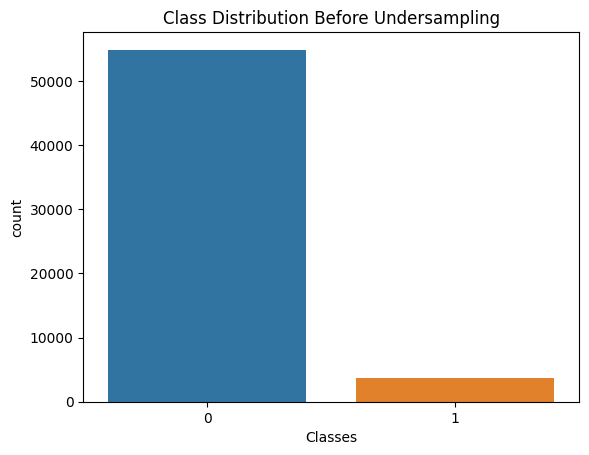

In [36]:
# visualise class distributions before over sampling.
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("Class Distribution Before Undersampling")
sns.countplot(data=df, x="is_claim")
plt.xlabel("Classes")

In [51]:
# import tomeklink and create object with strategy of reducing from majority class. 
from imblearn.under_sampling import TomekLinks

# tomekObj = TomekLinks(sampling_strategy='auto')
tomekObj = TomekLinks()

# get target and feature data in variables.
target = df['is_claim']
features = df[['engine_type','fuel_type','population_density','cylinder','transmission_type','gear_box','length','width','height','gross_weight','is_speed_alert']]
# 
print( f"Data shape: {features.shape}" )
print(f"target distribution before undersampling \n{target.value_counts()}" )

Data shape: (58592, 11)
target distribution before undersampling 
0    54844
1     3748
Name: is_claim, dtype: int64


In [54]:
# 
for i in range(10):
    x_sample, y_sample = tomekObj.fit_resample(features, target)
# 
print(f"Data shape: {x_sample.shape}" )
print(f"target distribution after undersampling \n{y_sample.value_counts()}" )

Data shape: (58592, 11)
target distribution after undersampling 
0    54844
1     3748
Name: is_claim, dtype: int64


#### Save new data to file.

In [99]:
df.to_csv("./data/processed_data.csv", index=False)